In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as si
import warnings
warnings.filterwarnings('ignore')

import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [3]:
class backtesting():
    def __init__(self,BO_spread,TTE,signal,data,r_f=0):
        self.r_f = r_f
        self.BO_spread = BO_spread
        self.TTE = TTE
        self.signal = signal
        self.data = data
        self.ret = calculate_backtest_return(BO_spread,TTE,signal,data)
        self.daily_return = self.ret.copy()
        self.daily_return.index = self.daily_return.index.date
        self.daily_return = self.daily_return.groupby(self.daily_return.index).sum()
        self.daily_std = np.std(self.daily_return)
        self.IR = np.mean(self.daily_return/self.daily_std)
    def plot_accumulate_return(self):
        self.daily_return.cumsum().plot()

In [4]:
def calculate_backtest_return(BO_spread,TTE,signal,data):
    backtest = pd.concat([data,signal],axis = 1).dropna()
    backtest['Price_pre'] = backtest['Price'].shift()
    backtest['signal_pre'] = backtest['signal'].shift()
    backtest['signal_pre_pre'] = backtest['signal_pre'].shift()
    backtest.dropna(inplace = True)
    backtest['return'] = ((backtest['Price'] - backtest['Price_pre'])/backtest['Price_pre'])*backtest['signal_pre']-np.abs(backtest['signal_pre']-backtest['signal_pre_pre'])*BO_spread/2/backtest['Price_pre']
    return backtest['return']

In [5]:
USD_JPY = pd.read_csv('NYU_USD_JPY_2016_Fall2019 .csv')
USD_JPY.Date = pd.to_datetime(USD_JPY.Date)

In [6]:
USD_JPY

,Ticker,Date,Price,Flow
0,USD/JPY_B,2016-01-01 17:00:00,120.191,1.944591
1,USD/JPY_B,2016-01-03 18:00:00,120.285,1.900000
2,USD/JPY_B,2016-01-03 19:00:00,120.317,1.870539
3,USD/JPY_B,2016-01-03 20:00:00,120.371,1.881090
4,USD/JPY_B,2016-01-03 21:00:00,120.028,1.899257
5,USD/JPY_B,2016-01-03 22:00:00,119.818,1.934820
6,USD/JPY_B,2016-01-03 23:00:00,119.681,1.944915
7,USD/JPY_B,2016-01-04 00:00:00,119.556,1.902500
8,USD/JPY_B,2016-01-04 01:00:00,119.385,1.901763
9,USD/JPY_B,2016-01-04 02:00:00,119.426,1.903766


In [7]:
XAU_USD = pd.read_csv('NYU_XAU_USD_20142015_Fall2019.csv')
XAU_USD.Date = pd.to_datetime(XAU_USD.Date)

In [8]:
XAU_USD

,Ticker,Date,Price,Flow
0,XAU/USD_B,2014-01-02 01:00:00,1222.96,2.234127
1,XAU/USD_B,2014-01-02 02:00:00,1222.39,1.989209
2,XAU/USD_B,2014-01-02 03:00:00,1221.76,1.910035
3,XAU/USD_B,2014-01-02 04:00:00,1221.68,1.910035
4,XAU/USD_B,2014-01-02 05:00:00,1217.61,1.846154
5,XAU/USD_B,2014-01-02 06:00:00,1217.10,1.871622
6,XAU/USD_B,2014-01-02 07:00:00,1222.69,1.842809
7,XAU/USD_B,2014-01-02 08:00:00,1226.32,1.812298
8,XAU/USD_B,2014-01-02 09:00:00,1224.18,1.952703
9,XAU/USD_B,2014-01-02 10:00:00,1226.53,1.882736


# Prepare data

In [9]:
def df_prepare(df):
    new_df = df.copy()
    new_df["Return"] = new_df["Price"].diff()/new_df["Price"]

    # adj flow is L/S in range(0,inf)
    new_df["adj_flow"] = new_df["Flow"]
    new_df["adj_flow"][new_df["adj_flow"]<=0] = -1/new_df["adj_flow"][new_df["adj_flow"]<=0]
    #new_df = new_df.set_index("Date")
    return new_df


In [10]:
clean_USD_JPY = df_prepare(USD_JPY).dropna()
clean_USD_JPY

,Ticker,Date,Price,Flow,Return,adj_flow
1,USD/JPY_B,2016-01-03 18:00:00,120.285,1.900000,0.000781,1.900000
2,USD/JPY_B,2016-01-03 19:00:00,120.317,1.870539,0.000266,1.870539
3,USD/JPY_B,2016-01-03 20:00:00,120.371,1.881090,0.000449,1.881090
4,USD/JPY_B,2016-01-03 21:00:00,120.028,1.899257,-0.002858,1.899257
5,USD/JPY_B,2016-01-03 22:00:00,119.818,1.934820,-0.001753,1.934820
6,USD/JPY_B,2016-01-03 23:00:00,119.681,1.944915,-0.001145,1.944915
7,USD/JPY_B,2016-01-04 00:00:00,119.556,1.902500,-0.001046,1.902500
8,USD/JPY_B,2016-01-04 01:00:00,119.385,1.901763,-0.001432,1.901763
9,USD/JPY_B,2016-01-04 02:00:00,119.426,1.903766,0.000343,1.903766
10,USD/JPY_B,2016-01-04 03:00:00,118.959,1.907251,-0.003926,1.907251


In [11]:
clean_XAU_USD = df_prepare(XAU_USD).dropna()
clean_XAU_USD

,Ticker,Date,Price,Flow,Return,adj_flow
1,XAU/USD_B,2014-01-02 02:00:00,1222.39,1.989209,-0.000466,1.989209
2,XAU/USD_B,2014-01-02 03:00:00,1221.76,1.910035,-0.000516,1.910035
3,XAU/USD_B,2014-01-02 04:00:00,1221.68,1.910035,-0.000065,1.910035
4,XAU/USD_B,2014-01-02 05:00:00,1217.61,1.846154,-0.003343,1.846154
5,XAU/USD_B,2014-01-02 06:00:00,1217.10,1.871622,-0.000419,1.871622
6,XAU/USD_B,2014-01-02 07:00:00,1222.69,1.842809,0.004572,1.842809
7,XAU/USD_B,2014-01-02 08:00:00,1226.32,1.812298,0.002960,1.812298
8,XAU/USD_B,2014-01-02 09:00:00,1224.18,1.952703,-0.001748,1.952703
9,XAU/USD_B,2014-01-02 10:00:00,1226.53,1.882736,0.001916,1.882736
10,XAU/USD_B,2014-01-02 11:00:00,1224.28,1.796238,-0.001838,1.796238


# Get factors

In [12]:
class Factors():
    
    def __init__(self, df):
        self.price_flow= df
     
    # SMA: rolling mean
    def MA_price(self, periods):
        MA_price = self.price_flow['Price'].rolling(window=periods).mean() 
        return MA_price  
    def MA_flow(self, periods):
        MA_flow = self.price_flow['adj_flow'].rolling(window=periods).mean() 
        return MA_flow
    
    
    # Var: rolling std of price
    def Var_price(self, periods):
        Var_price = self.price_flow['Price'].rolling(window=periods).std() 
        return Var_price  
    def Var_flow(self, periods):
        Var_flow = self.price_flow['adj_flow'].rolling(window=periods).std() 
        return Var_flow
    
    # High Low rolling
    def High_flow(self, periods):
        High_flow = self.price_flow['adj_flow'].rolling(window=periods).max()
        return High_flow
    def Low_flow(self, periods):
        Low_flow = self.price_flow['adj_flow'].rolling(window=periods).min()
        return Low_flow
    def High_price(self, periods):
        High_price = self.price_flow['Price'].rolling(window=periods).max()
        return High_price
    def Low_price(self, periods):
        Low_price = self.price_flow['Price'].rolling(window=periods).min()
        return Low_price
    
    # Corr of price and flow
    def corr_p_f(self, periods):
        corr_p_f = clean_USD_JPY[["adj_flow","Price"]].rolling(6).corr().loc[pd.IndexSlice[:,"adj_flow"],"Price"].reset_index().set_index("level_0")["Price"]
        return corr_p_f
    
    # Exponentially-weighted moving average 
    def EWMA_price(self, periods):
        EWMA_price = self.price_flow['Price'].ewm(span=periods).mean()
        return EWMA_price
    
    def EWMA_flow(self, periods):
        EWMA_flow = self.price_flow['adj_flow'].ewm(span=periods).mean()
        return EWMA_flow 
    
    # RSI: Relative strength index (ratio of up-moves to down-moves)
    def RSI(self, periods):
        delta = self.price_flow['Price'].copy().diff()
        up, down = delta.copy(), delta.copy()
        up[up < 0] = 0
        down[down > 0] = 0

        # Calculate the SMA
        roll_up = up.rolling(periods).mean()
        roll_down = down.rolling(periods).mean()

        # Calculate the RSI based on SMA
        RS = abs(roll_up / roll_down)
        RSI = 100.0 - (100.0 / (1.0 + RS))
        
        return RSI
        


In [13]:
UJ_class = Factors(clean_USD_JPY)

In [14]:
Factor_USD_JPY = clean_USD_JPY.copy()
Factor_USD_JPY

,Ticker,Date,Price,Flow,Return,adj_flow
1,USD/JPY_B,2016-01-03 18:00:00,120.285,1.900000,0.000781,1.900000
2,USD/JPY_B,2016-01-03 19:00:00,120.317,1.870539,0.000266,1.870539
3,USD/JPY_B,2016-01-03 20:00:00,120.371,1.881090,0.000449,1.881090
4,USD/JPY_B,2016-01-03 21:00:00,120.028,1.899257,-0.002858,1.899257
5,USD/JPY_B,2016-01-03 22:00:00,119.818,1.934820,-0.001753,1.934820
6,USD/JPY_B,2016-01-03 23:00:00,119.681,1.944915,-0.001145,1.944915
7,USD/JPY_B,2016-01-04 00:00:00,119.556,1.902500,-0.001046,1.902500
8,USD/JPY_B,2016-01-04 01:00:00,119.385,1.901763,-0.001432,1.901763
9,USD/JPY_B,2016-01-04 02:00:00,119.426,1.903766,0.000343,1.903766
10,USD/JPY_B,2016-01-04 03:00:00,118.959,1.907251,-0.003926,1.907251


In [15]:
def prepare_factors(clean_input): 
    UJ_class = Factors(clean_input)
    Factor_USD_ = clean_input.copy()
    Factor_USD_["MA_price"] = UJ_class.MA_price(6)
    Factor_USD_["MA_flow"] = UJ_class.MA_flow(6)
    Factor_USD_["Var_price"] = UJ_class.Var_price(6)
    Factor_USD_["Var_flow"] = UJ_class.Var_flow(6)
    Factor_USD_["High_flow"] = UJ_class.High_flow(6)
    Factor_USD_["Low_flow"] = UJ_class.Low_flow(6)
    Factor_USD_["High_price"] = UJ_class.High_price(6)
    Factor_USD_["Low_price"] = UJ_class.Low_price(6)
    Factor_USD_["EWMA_price"] = UJ_class.EWMA_price(6)
    Factor_USD_["EWMA_flow"] = UJ_class.EWMA_flow(6)
    Factor_USD_["corr_p_f"] = UJ_class.corr_p_f(6)
    Factor_USD_["corr_p_f"][Factor_USD_["corr_p_f"] < -1] = 0
    Factor_USD_["corr_p_f"][Factor_USD_["corr_p_f"] > 1] = 0
    Factor_USD_["RSI"] = UJ_class.RSI(6)
    return Factor_USD_

In [16]:
Factor_USD_JPY["MA_price"] = UJ_class.MA_price(6)
Factor_USD_JPY["MA_flow"] = UJ_class.MA_flow(6)
Factor_USD_JPY["Var_price"] = UJ_class.Var_price(6)
Factor_USD_JPY["Var_flow"] = UJ_class.Var_flow(6)

Factor_USD_JPY["High_flow"] = UJ_class.High_flow(6)
Factor_USD_JPY["Low_flow"] = UJ_class.Low_flow(6)
Factor_USD_JPY["High_price"] = UJ_class.High_price(6)
Factor_USD_JPY["Low_price"] = UJ_class.Low_price(6)

Factor_USD_JPY["EWMA_price"] = UJ_class.EWMA_price(6)
Factor_USD_JPY["EWMA_flow"] = UJ_class.EWMA_flow(6)

Factor_USD_JPY["corr_p_f"] = UJ_class.corr_p_f(6)
Factor_USD_JPY["corr_p_f"][Factor_USD_JPY["corr_p_f"] < -1] = 0
Factor_USD_JPY["corr_p_f"][Factor_USD_JPY["corr_p_f"] > 1] = 0


Factor_USD_JPY["RSI"] = UJ_class.RSI(6)

Factor_USD_JPY["R_direction"] = None
Factor_USD_JPY["R_direction"][Factor_USD_JPY["Return"]> 0.00001]=1
Factor_USD_JPY["R_direction"][Factor_USD_JPY["Return"]< -0.00001]=-1
Factor_USD_JPY["R_direction"][(-0.00001 < Factor_USD_JPY["Return"]) & (Factor_USD_JPY["Return"]< 0.00001)]=0
Factor_USD_JPY["R_direction"] = Factor_USD_JPY["R_direction"].shift(1)

In [17]:
Factor_USD_JPY = Factor_USD_JPY.dropna()
Factor_USD_JPY = Factor_USD_JPY.set_index(Factor_USD_JPY.Date).drop(['Ticker','Date'],axis=1)
Factor_USD_JPY = Factor_USD_JPY.dropna()
Factor_USD_JPY["R_direction"] = Factor_USD_JPY["R_direction"].shift(-1)
Factor_USD_JPY

,Price,Flow,Return,adj_flow,MA_price,MA_flow,Var_price,Var_flow,High_flow,Low_flow,High_price,Low_price,EWMA_price,EWMA_flow,corr_p_f,RSI,R_direction
Date,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00,119.556,1.902500,-0.001046,1.902500,119.961833,1.905520,0.335319,0.029255,1.944915,1.870539,120.371,119.556,119.822870,1.913156,-0.752036,9.544950,-1
2016-01-04 01:00:00,119.385,1.901763,-0.001432,1.901763,119.806500,1.910724,0.353275,0.024113,1.944915,1.881090,120.371,119.385,119.688671,1.909664,-0.409574,5.192308,-1
2016-01-04 02:00:00,119.426,1.903766,0.000343,1.903766,119.649000,1.914504,0.245479,0.019959,1.944915,1.899257,120.028,119.385,119.609805,1.907893,0.224616,3.992210,1
2016-01-04 03:00:00,118.959,1.907251,-0.003926,1.907251,119.470833,1.915836,0.297758,0.018980,1.944915,1.901763,119.818,118.959,119.417202,1.907703,0.626711,3.562120,-1
2016-01-04 04:00:00,119.009,1.996485,0.000420,1.996485,119.336000,1.926113,0.292227,0.038240,1.996485,1.901763,119.681,118.959,119.297620,1.933712,-0.318813,9.182644,1
2016-01-04 05:00:00,118.874,1.981002,-0.001136,1.981002,119.201500,1.932128,0.287354,0.044167,1.996485,1.901763,119.556,118.874,119.174412,1.947466,-0.706055,9.201213,-1
2016-01-04 06:00:00,118.982,1.986242,0.000908,1.986242,119.105833,1.946085,0.236837,0.046120,1.996485,1.901763,119.426,118.874,119.118736,1.958686,-0.698864,20.473251,1
2016-01-04 07:00:00,118.793,2.046875,-0.001591,2.046875,119.007167,1.970270,0.219990,0.055353,2.046875,1.903766,119.426,118.793,119.024823,1.984112,-0.706367,20.101010,-1
2016-01-04 08:00:00,119.072,2.118062,0.002343,2.118062,118.948167,2.005986,0.099875,0.070832,2.118062,1.907251,119.072,118.793,119.038390,2.022631,0.199920,35.586319,1


In [18]:
from sklearn.model_selection import train_test_split

X = Factor_USD_JPY.drop(['R_direction'],axis=1).astype('float')

y = Factor_USD_JPY.R_direction.astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
Factor_USD_JPY.describe()

,Price,Flow,Return,adj_flow,MA_price,MA_flow,Var_price,Var_flow,High_flow,Low_flow,High_price,Low_price,EWMA_price,EWMA_flow,corr_p_f,RSI
count,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000
mean,109.529331,1.462520,-0.000007,1.832509,109.531144,1.832748,0.141520,0.050058,1.896977,1.768122,109.712419,109.345285,109.531138,1.832730,-0.076098,50.528219
std,5.618908,1.471697,0.001541,0.880036,5.618692,0.877414,0.119269,0.053193,0.909382,0.846679,5.629699,5.608881,5.617379,0.876028,0.612491,24.725590
min,99.725000,-1.740477,-0.030925,0.574555,99.902833,0.575551,0.010558,0.000000,0.580528,0.574555,100.031000,99.725000,99.930351,0.580710,-0.999637,0.000000
25%,104.142500,1.120891,-0.000690,1.120891,104.142917,1.120848,0.072302,0.021020,1.161228,1.089864,104.308000,103.936000,104.146328,1.123094,-0.647043,31.474799
50%,110.185000,1.683527,0.000010,1.683527,110.169500,1.696961,0.113200,0.035526,1.755472,1.619000,110.349000,110.008000,110.172988,1.696773,-0.135397,50.736842
75%,113.808000,2.329646,0.000715,2.329646,113.787667,2.326181,0.175737,0.061496,2.413000,2.203075,113.942000,113.624000,113.786407,2.322818,0.494365,69.922851
max,121.590000,5.154900,0.014296,5.154900,121.280833,4.947200,2.149662,1.111347,5.154900,4.774100,121.590000,121.244000,121.282523,4.938477,0.997417,100.000000


# 这个图要！ factors distribution

In [20]:
Factor_USD_JPY

,Price,Flow,Return,adj_flow,MA_price,MA_flow,Var_price,Var_flow,High_flow,Low_flow,High_price,Low_price,EWMA_price,EWMA_flow,corr_p_f,RSI,R_direction
Date,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00,119.556,1.902500,-0.001046,1.902500,119.961833,1.905520,0.335319,0.029255,1.944915,1.870539,120.371,119.556,119.822870,1.913156,-0.752036,9.544950,-1
2016-01-04 01:00:00,119.385,1.901763,-0.001432,1.901763,119.806500,1.910724,0.353275,0.024113,1.944915,1.881090,120.371,119.385,119.688671,1.909664,-0.409574,5.192308,-1
2016-01-04 02:00:00,119.426,1.903766,0.000343,1.903766,119.649000,1.914504,0.245479,0.019959,1.944915,1.899257,120.028,119.385,119.609805,1.907893,0.224616,3.992210,1
2016-01-04 03:00:00,118.959,1.907251,-0.003926,1.907251,119.470833,1.915836,0.297758,0.018980,1.944915,1.901763,119.818,118.959,119.417202,1.907703,0.626711,3.562120,-1
2016-01-04 04:00:00,119.009,1.996485,0.000420,1.996485,119.336000,1.926113,0.292227,0.038240,1.996485,1.901763,119.681,118.959,119.297620,1.933712,-0.318813,9.182644,1
2016-01-04 05:00:00,118.874,1.981002,-0.001136,1.981002,119.201500,1.932128,0.287354,0.044167,1.996485,1.901763,119.556,118.874,119.174412,1.947466,-0.706055,9.201213,-1
2016-01-04 06:00:00,118.982,1.986242,0.000908,1.986242,119.105833,1.946085,0.236837,0.046120,1.996485,1.901763,119.426,118.874,119.118736,1.958686,-0.698864,20.473251,1
2016-01-04 07:00:00,118.793,2.046875,-0.001591,2.046875,119.007167,1.970270,0.219990,0.055353,2.046875,1.903766,119.426,118.793,119.024823,1.984112,-0.706367,20.101010,-1
2016-01-04 08:00:00,119.072,2.118062,0.002343,2.118062,118.948167,2.005986,0.099875,0.070832,2.118062,1.907251,119.072,118.793,119.038390,2.022631,0.199920,35.586319,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCCAFF9E10>,
      dtype=object)

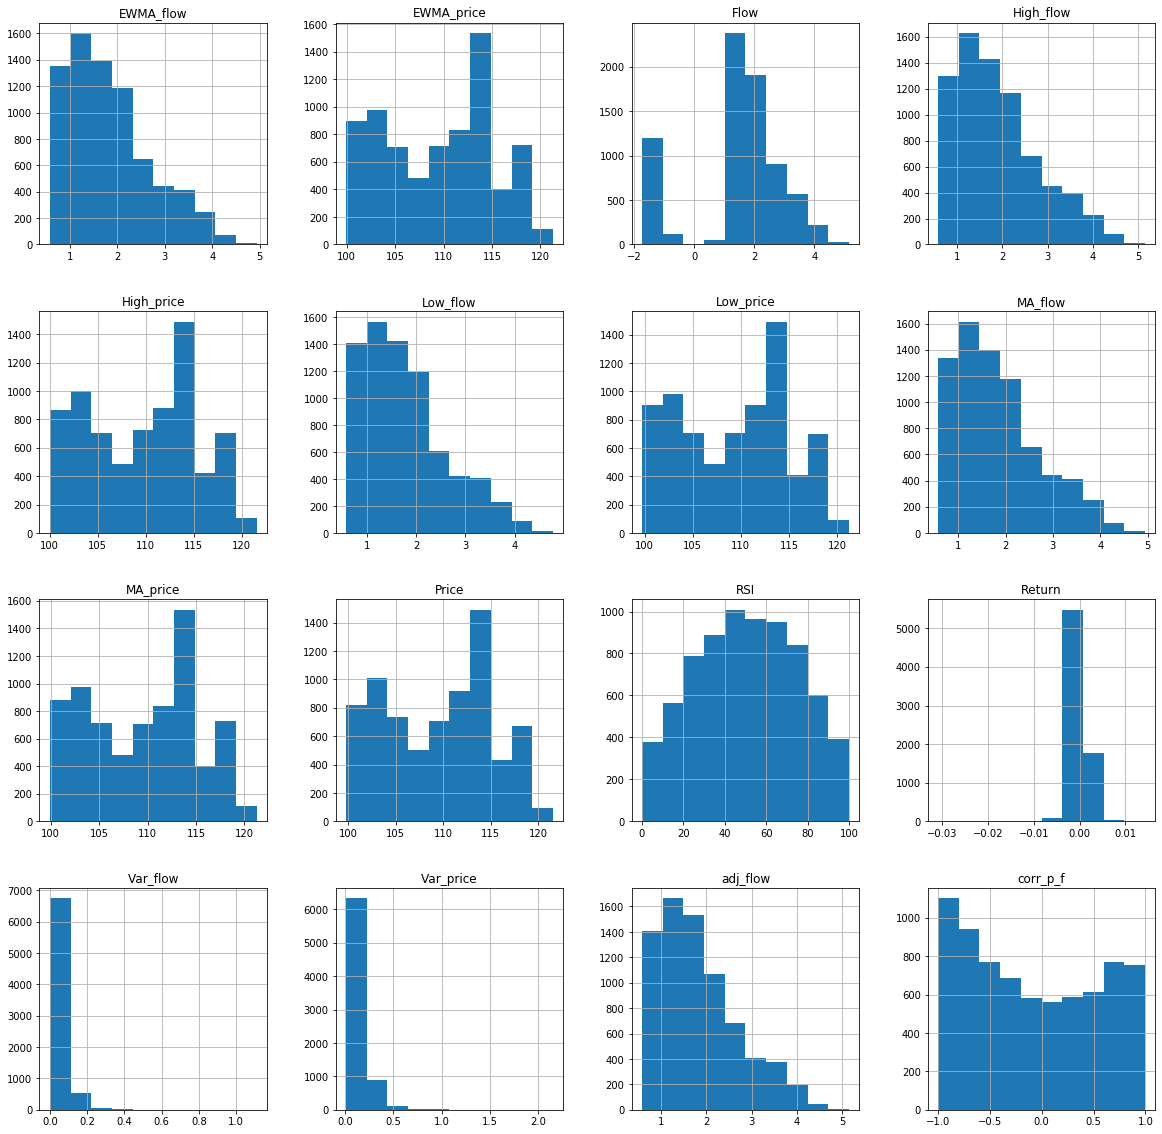

In [21]:
Factor_USD_JPY.hist(figsize=(20,20))


In [23]:
Factor_XAU_USD = prepare_factors(clean_XAU_USD)

In [25]:
Factor_XAU_USD = prepare_factors(clean_XAU_USD)

Factor_XAU_USD["signal"] = 0
Factor_XAU_USD["signal"][Factor_XAU_USD['RSI'] < 30] = -1
Factor_XAU_USD["signal"][Factor_XAU_USD['RSI'] > 70] = 1

In [26]:
Factor_USD_JPY["signal"] = 0
Factor_USD_JPY["signal"][Factor_USD_JPY['RSI'] < 30] = -1
Factor_USD_JPY["signal"][Factor_USD_JPY['RSI'] > 70] = 1

# 下面两个图也要！ 就要满足各种条件的 （几个bid ask 和 延迟）

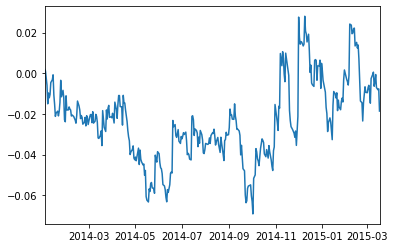

In [27]:
Factor_XAU_USD = Factor_XAU_USD.set_index(Factor_XAU_USD.Date).drop(['Ticker','Date'],axis=1)
backtesting(0.0002,2,Factor_XAU_USD["signal"],Factor_XAU_USD.drop(columns=["signal"])).plot_accumulate_return()

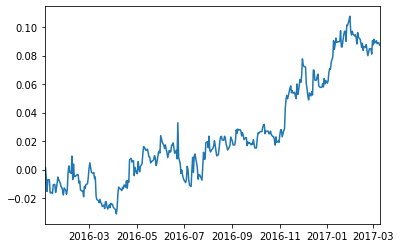

In [28]:
backtesting(0.0001,2,Factor_USD_JPY["signal"],Factor_USD_JPY.drop(columns=["signal"])).plot_accumulate_return()

# Correlation matrix

# 这个图要！ factors correlation

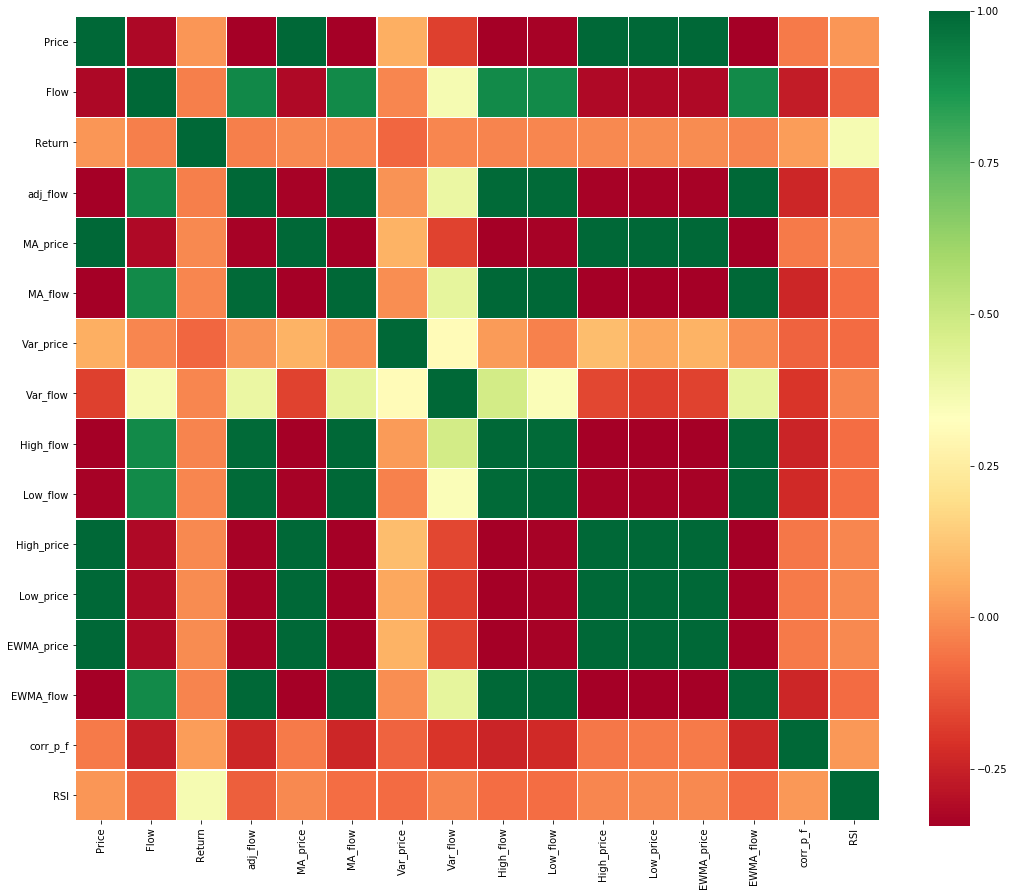

In [29]:
import seaborn as sns

def visualize_data_sns(df):
    df_corr = df.corr()
    f, ax = plt.subplots(figsize=(18, 15))

    sns.heatmap(df_corr, square=True, linewidths=0.2, cmap='RdYlGn', ax=ax)
    plt.savefig('corr.png', dpi=100)
    plt.show()
    
visualize_data_sns(X_train)

## Feature selection  (ExtraTreesClassifier)

### - Benefits:
    - Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
    - Improves Accuracy: Less misleading data means modeling accuracy improves.
    - Reduces Training Time: Less data means that algorithms train faste
### - What I do:
    - Using Extra Trees to estimate the importance of features.
    - The model gives an importance score for each attribute, the larger score the more important the attribute.
    - Delete several unimportant features based on the important scores to avoid overfitting.

# 这个图也要！factor importance selection

[0.07289994 0.06255697 0.06288035 0.06082158 0.05802649 0.07135014
 0.07175823 0.05239865 0.05255618 0.04800335 0.05121362 0.06193265
 0.06304003 0.07771724 0.13284459]


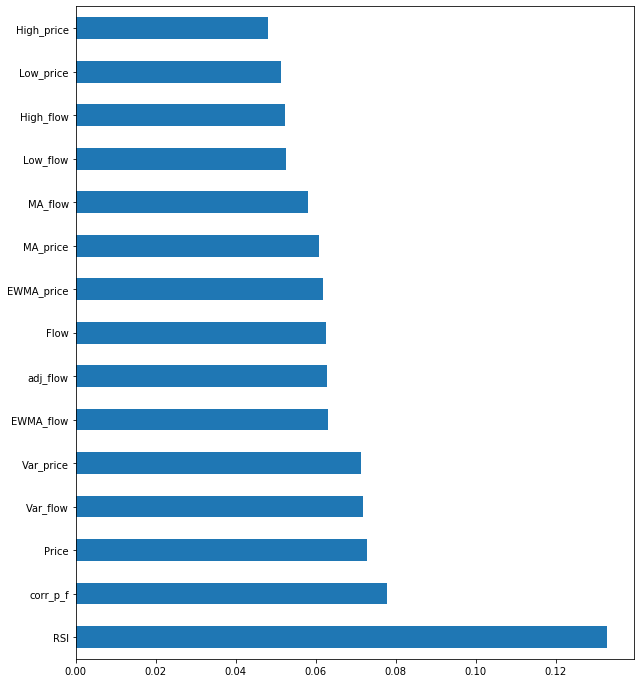

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion='entropy')
X_train = X_train.drop("Return",axis=1)
model.fit(X_train.astype('float') , y_train.astype('float') )

print(model.feature_importances_)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
fig = plt.figure(figsize=(10,12))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(len(X_train.columns)).plot(kind='barh')
plt.show()

In [31]:
X_train

,Price,Flow,adj_flow,MA_price,MA_flow,Var_price,Var_flow,High_flow,Low_flow,High_price,Low_price,EWMA_price,EWMA_flow,corr_p_f,RSI
Date,,,,,,,,,,,,,,,
2016-01-04 00:00:00,119.556,1.902500,1.902500,119.961833,1.905520,0.335319,0.029255,1.944915,1.870539,120.371,119.556,119.822870,1.913156,-0.752036,9.544950
2016-01-04 01:00:00,119.385,1.901763,1.901763,119.806500,1.910724,0.353275,0.024113,1.944915,1.881090,120.371,119.385,119.688671,1.909664,-0.409574,5.192308
2016-01-04 02:00:00,119.426,1.903766,1.903766,119.649000,1.914504,0.245479,0.019959,1.944915,1.899257,120.028,119.385,119.609805,1.907893,0.224616,3.992210
2016-01-04 03:00:00,118.959,1.907251,1.907251,119.470833,1.915836,0.297758,0.018980,1.944915,1.901763,119.818,118.959,119.417202,1.907703,0.626711,3.562120
2016-01-04 04:00:00,119.009,1.996485,1.996485,119.336000,1.926113,0.292227,0.038240,1.996485,1.901763,119.681,118.959,119.297620,1.933712,-0.318813,9.182644
2016-01-04 05:00:00,118.874,1.981002,1.981002,119.201500,1.932128,0.287354,0.044167,1.996485,1.901763,119.556,118.874,119.174412,1.947466,-0.706055,9.201213
2016-01-04 06:00:00,118.982,1.986242,1.986242,119.105833,1.946085,0.236837,0.046120,1.996485,1.901763,119.426,118.874,119.118736,1.958686,-0.698864,20.473251
2016-01-04 07:00:00,118.793,2.046875,2.046875,119.007167,1.970270,0.219990,0.055353,2.046875,1.903766,119.426,118.793,119.024823,1.984112,-0.706367,20.101010
2016-01-04 08:00:00,119.072,2.118062,2.118062,118.948167,2.005986,0.099875,0.070832,2.118062,1.907251,119.072,118.793,119.038390,2.022631,0.199920,35.586319


In [32]:
X

,Price,Flow,Return,adj_flow,MA_price,MA_flow,Var_price,Var_flow,High_flow,Low_flow,High_price,Low_price,EWMA_price,EWMA_flow,corr_p_f,RSI
Date,,,,,,,,,,,,,,,,
2016-01-04 00:00:00,119.556,1.902500,-0.001046,1.902500,119.961833,1.905520,0.335319,0.029255,1.944915,1.870539,120.371,119.556,119.822870,1.913156,-0.752036,9.544950
2016-01-04 01:00:00,119.385,1.901763,-0.001432,1.901763,119.806500,1.910724,0.353275,0.024113,1.944915,1.881090,120.371,119.385,119.688671,1.909664,-0.409574,5.192308
2016-01-04 02:00:00,119.426,1.903766,0.000343,1.903766,119.649000,1.914504,0.245479,0.019959,1.944915,1.899257,120.028,119.385,119.609805,1.907893,0.224616,3.992210
2016-01-04 03:00:00,118.959,1.907251,-0.003926,1.907251,119.470833,1.915836,0.297758,0.018980,1.944915,1.901763,119.818,118.959,119.417202,1.907703,0.626711,3.562120
2016-01-04 04:00:00,119.009,1.996485,0.000420,1.996485,119.336000,1.926113,0.292227,0.038240,1.996485,1.901763,119.681,118.959,119.297620,1.933712,-0.318813,9.182644
2016-01-04 05:00:00,118.874,1.981002,-0.001136,1.981002,119.201500,1.932128,0.287354,0.044167,1.996485,1.901763,119.556,118.874,119.174412,1.947466,-0.706055,9.201213
2016-01-04 06:00:00,118.982,1.986242,0.000908,1.986242,119.105833,1.946085,0.236837,0.046120,1.996485,1.901763,119.426,118.874,119.118736,1.958686,-0.698864,20.473251
2016-01-04 07:00:00,118.793,2.046875,-0.001591,2.046875,119.007167,1.970270,0.219990,0.055353,2.046875,1.903766,119.426,118.793,119.024823,1.984112,-0.706367,20.101010
2016-01-04 08:00:00,119.072,2.118062,0.002343,2.118062,118.948167,2.005986,0.099875,0.070832,2.118062,1.907251,119.072,118.793,119.038390,2.022631,0.199920,35.586319


In [35]:
import hmmlearn
from hmmlearn.hmm import GaussianHMM
hmm_model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000).fit(np.array(X.Return).reshape(-1,1))
print("Model Score:", hmm_model.score(np.array(X.Return).reshape(-1,1)))


Model Score: 36812.50142745253


In [36]:
Z2 = hmm_model.predict(np.array(X.Return).reshape(-1,1))
X['market regime'] = pd.DataFrame(Z2,index=X.index).astype('category')

Text(0, 0.5, 'Return')

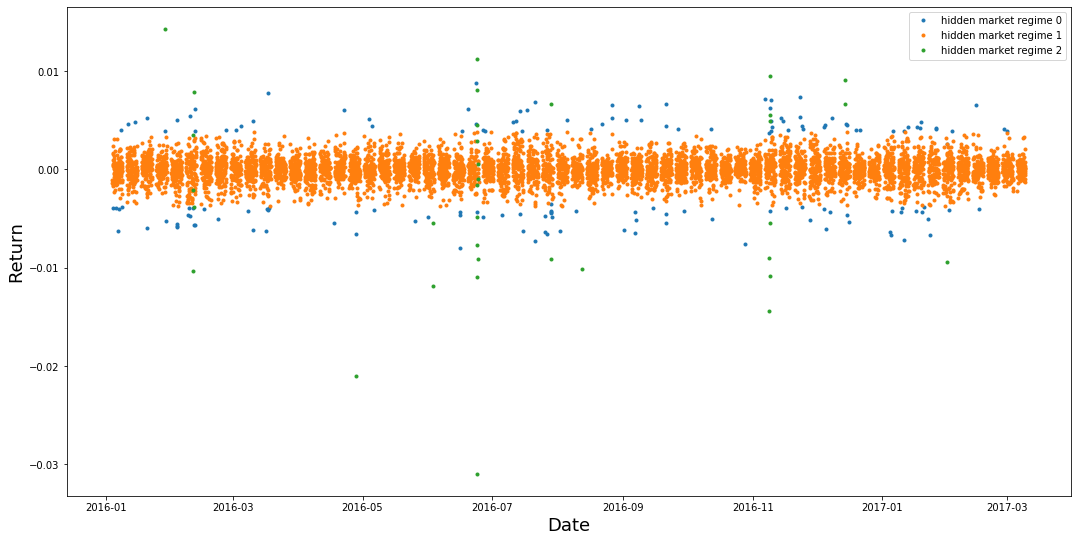

In [37]:
plt.figure(figsize = (18,9))
for i in range(hmm_model.n_components):
    pos = (X['market regime'] == i)
    #plt.plot(X_train.index[pos],X_train.Price[pos],'.',label='hidden market regime {}'.format(i),lw=1)
    plt.plot(X.index[pos],X.Return[pos],'.',label='hidden market regime {}'.format(i),lw=1)
plt.legend(loc='best')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Return',fontsize=18)

In [ ]:
plt.figure(figsize = (18,9))
for i in range(hmm_model.n_components):
    pos = (X['market regime'] == i)
    plt.plot(X.index[pos],X.Price[pos],'.',label='hidden market regime {}'.format(i),lw=1)
plt.legend(loc='best')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)